## clustering demo

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
#generate sample data
X,Y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)

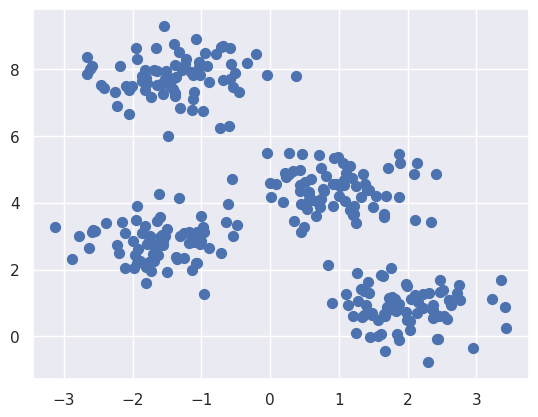

In [3]:
#plot the data
plt.scatter(X[:,0],X[:,1],s=50)
plt.show()

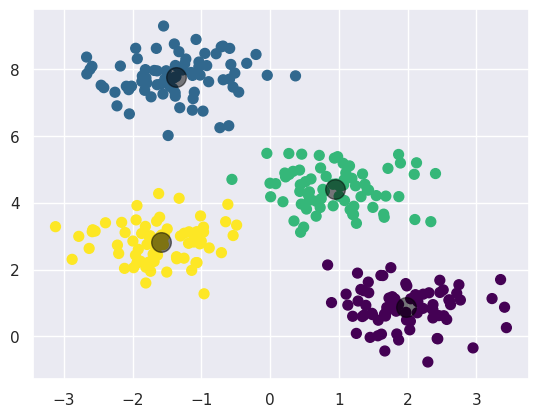

In [4]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=4)
model.fit(X)

y_KMeans=model.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_KMeans,s=50,cmap='viridis')

centers=model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.50);


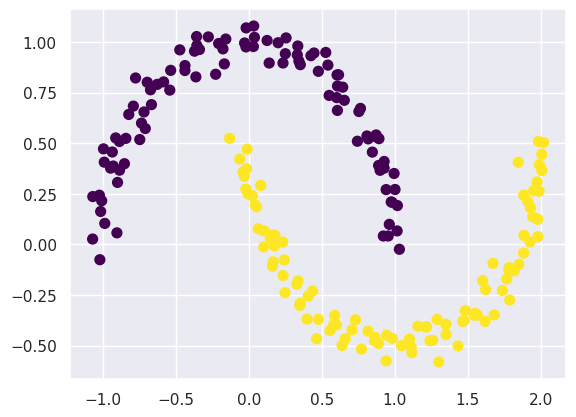

In [5]:
from sklearn.datasets import make_moons
X,Y=make_moons(200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='viridis');

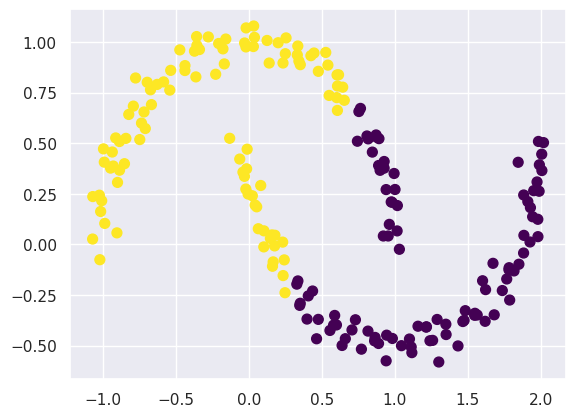

In [6]:
labels=KMeans(2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis');

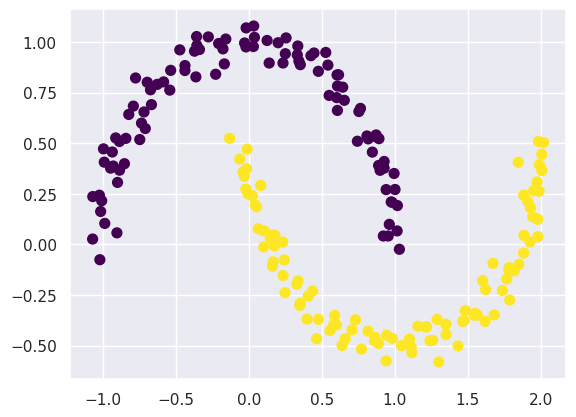

In [7]:
from sklearn.cluster import DBSCAN
labels1=DBSCAN(eps=.3,min_samples=10).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels1,s=50,cmap='viridis');

In [8]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [9]:
kmeans=KMeans(n_clusters=10,random_state=0)
clusters=kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

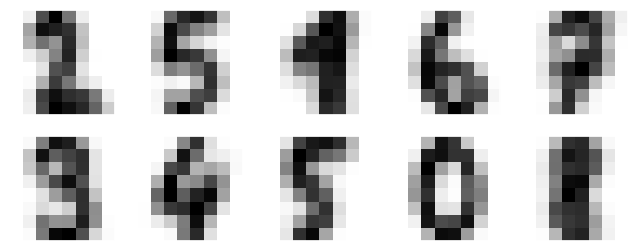

In [10]:
fig,ax=plt.subplots(2,5,figsize=(8,3))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
  axi.set(xticks=[],yticks=[])
  axi.imshow(center,cmap=plt.cm.binary)

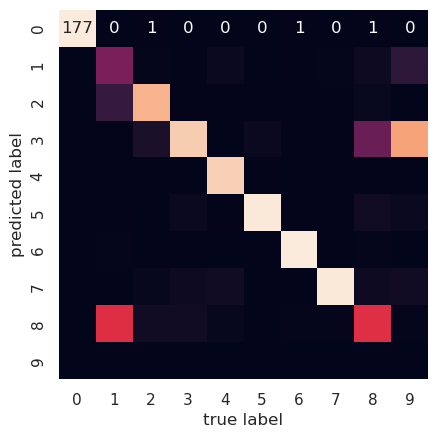

In [11]:
from scipy.stats import mode 

labels=np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask]=mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target,labels)

from sklearn.metrics import confusion_matrix
mat=confusion_matrix(digits.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
               xticklabels=digits.target_names,
               yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

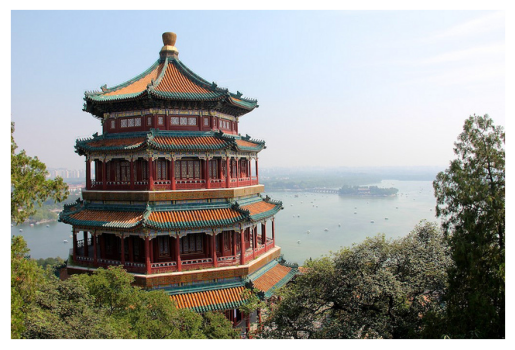

In [13]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')   
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);